<a href="https://colab.research.google.com/github/SupplyChainData/Proyek-Analisis-Data/blob/main/Proyek_Analisis_Data_by_Eko_Setyanto.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Proyek Analisis Data: [E-commerce-public-dataset]
- **Nama:** [Eko Setyanto]
- **Email:** [echonewman@yahoo.com]
- **ID Dicoding:** [l254ywd046]

## Menentukan Pertanyaan Bisnis

- Pertanyaan 1 : Bagaimana pengaruh cuaca terhadap kuantitas penyewaan sepeda dalam bike share system pada periode 2011-2012 ?
- Pertanyaan 2 : Bagaimana pengaruh musim terhadap kuantitas penyewaan sepeda dalam bike share system pada periode 2011-2012 ?
- Pertanyaan 3 : Bagaimana perbedaan penyewaan saat workingday & holiday dalam bike share system pada periode 2011-2012 ?

## Import Semua Packages/Library yang Digunakan

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

## Data Wrangling

### Gathering Data

In [3]:
# Data Harian Penyewaan Sepeda
day_df = pd.read_csv("day.csv")
day_df.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985
1,2,2011-01-02,1,0,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,131,670,801
2,3,2011-01-03,1,0,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309,120,1229,1349
3,4,2011-01-04,1,0,1,0,2,1,1,0.200000,0.212122,0.590435,0.160296,108,1454,1562
4,5,2011-01-05,1,0,1,0,3,1,1,0.226957,0.229270,0.436957,0.186900,82,1518,1600


In [32]:
day_df=day_df.drop(['instant','casual','registered','holiday','weekday','temp','atemp','hum','windspeed'],axis=1)

In [4]:
# Data per jam Penyewaan Sepeda
hour_df = pd.read_csv("hour.csv")
hour_df.head()


,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0,3,13,16
1,2,2011-01-01,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0,8,32,40
2,3,2011-01-01,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0,5,27,32
3,4,2011-01-01,1,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0,3,10,13
4,5,2011-01-01,1,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0,0,1,1


**Insight:**
- day.csv → data harian penyewaan sepeda
- hour.csv → data per jam penyewaan sepeda

### Assessing Data

In [5]:
# Assessing Jumlah Data untuk Data Harian
day_df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     731 non-null    int64  
 1   dteday      731 non-null    object 
 2   season      731 non-null    int64  
 3   yr          731 non-null    int64  
 4   mnth        731 non-null    int64  
 5   holiday     731 non-null    int64  
 6   weekday     731 non-null    int64  
 7   workingday  731 non-null    int64  
 8   weathersit  731 non-null    int64  
 9   temp        731 non-null    float64
 10  atemp       731 non-null    float64
 11  hum         731 non-null    float64
 12  windspeed   731 non-null    float64
 13  casual      731 non-null    int64  
 14  registered  731 non-null    int64  
 15  cnt         731 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.5+ KB


In [6]:
# Assessing Jumlah Data untuk Data per jam
hour_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17379 entries, 0 to 17378
Data columns (total 17 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     17379 non-null  int64  
 1   dteday      17379 non-null  object 
 2   season      17379 non-null  int64  
 3   yr          17379 non-null  int64  
 4   mnth        17379 non-null  int64  
 5   hr          17379 non-null  int64  
 6   holiday     17379 non-null  int64  
 7   weekday     17379 non-null  int64  
 8   workingday  17379 non-null  int64  
 9   weathersit  17379 non-null  int64  
 10  temp        17379 non-null  float64
 11  atemp       17379 non-null  float64
 12  hum         17379 non-null  float64
 13  windspeed   17379 non-null  float64
 14  casual      17379 non-null  int64  
 15  registered  17379 non-null  int64  
 16  cnt         17379 non-null  int64  
dtypes: float64(4), int64(12), object(1)
memory usage: 2.3+ MB


In [8]:
day_df['dteday'] = pd.to_datetime(day_df['dteday'])
day_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   instant     731 non-null    int64         
 1   dteday      731 non-null    datetime64[ns]
 2   season      731 non-null    int64         
 3   yr          731 non-null    int64         
 4   mnth        731 non-null    int64         
 5   holiday     731 non-null    int64         
 6   weekday     731 non-null    int64         
 7   workingday  731 non-null    int64         
 8   weathersit  731 non-null    int64         
 9   temp        731 non-null    float64       
 10  atemp       731 non-null    float64       
 11  hum         731 non-null    float64       
 12  windspeed   731 non-null    float64       
 13  casual      731 non-null    int64         
 14  registered  731 non-null    int64         
 15  cnt         731 non-null    int64         
dtypes: datetime64[ns](1), floa

In [9]:
hour_df['dteday'] = pd.to_datetime(hour_df['dteday'])
hour_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17379 entries, 0 to 17378
Data columns (total 17 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   instant     17379 non-null  int64         
 1   dteday      17379 non-null  datetime64[ns]
 2   season      17379 non-null  int64         
 3   yr          17379 non-null  int64         
 4   mnth        17379 non-null  int64         
 5   hr          17379 non-null  int64         
 6   holiday     17379 non-null  int64         
 7   weekday     17379 non-null  int64         
 8   workingday  17379 non-null  int64         
 9   weathersit  17379 non-null  int64         
 10  temp        17379 non-null  float64       
 11  atemp       17379 non-null  float64       
 12  hum         17379 non-null  float64       
 13  windspeed   17379 non-null  float64       
 14  casual      17379 non-null  int64         
 15  registered  17379 non-null  int64         
 16  cnt         17379 non-

In [10]:
# Assessing Duplikasi Data Harian
print("Jumlah duplikasi: ", day_df.duplicated().sum())

Jumlah duplikasi:  0


In [11]:
# Assessing Duplikasi Data per jam
print("Jumlah duplikasi: ", hour_df.duplicated().sum())

Jumlah duplikasi:  0


In [12]:
# Assesing Inaccurate value Data Harian
day_df.describe()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,731.000000,731,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000
mean,366.000000,2012-01-01 00:00:00,2.496580,0.500684,6.519836,0.028728,2.997264,0.683995,1.395349,0.495385,0.474354,0.627894,0.190486,848.176471,3656.172367,4504.348837
min,1.000000,2011-01-01 00:00:00,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.059130,0.079070,0.000000,0.022392,2.000000,20.000000,22.000000
25%,183.500000,2011-07-02 12:00:00,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,0.337083,0.337842,0.520000,0.134950,315.500000,2497.000000,3152.000000
50%,366.000000,2012-01-01 00:00:00,3.000000,1.000000,7.000000,0.000000,3.000000,1.000000,1.000000,0.498333,0.486733,0.626667,0.180975,713.000000,3662.000000,4548.000000
75%,548.500000,2012-07-01 12:00:00,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,0.655417,0.608602,0.730209,0.233214,1096.000000,4776.500000,5956.000000
max,731.000000,2012-12-31 00:00:00,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,0.861667,0.840896,0.972500,0.507463,3410.000000,6946.000000,8714.000000
std,211.165812,NaN,1.110807,0.500342,3.451913,0.167155,2.004787,0.465233,0.544894,0.183051,0.162961,0.142429,0.077498,686.622488,1560.256377,1937.211452


In [13]:
# Assesing Inaccurate value Data per jam
hour_df.describe()

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,17379.0000,17379,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000
mean,8690.0000,2012-01-02 04:08:34.552045568,2.501640,0.502561,6.537775,11.546752,0.028770,3.003683,0.682721,1.425283,0.496987,0.475775,0.627229,0.190098,35.676218,153.786869,189.463088
min,1.0000,2011-01-01 00:00:00,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.020000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,4345.5000,2011-07-04 00:00:00,2.000000,0.000000,4.000000,6.000000,0.000000,1.000000,0.000000,1.000000,0.340000,0.333300,0.480000,0.104500,4.000000,34.000000,40.000000
50%,8690.0000,2012-01-02 00:00:00,3.000000,1.000000,7.000000,12.000000,0.000000,3.000000,1.000000,1.000000,0.500000,0.484800,0.630000,0.194000,17.000000,115.000000,142.000000
75%,13034.5000,2012-07-02 00:00:00,3.000000,1.000000,10.000000,18.000000,0.000000,5.000000,1.000000,2.000000,0.660000,0.621200,0.780000,0.253700,48.000000,220.000000,281.000000
max,17379.0000,2012-12-31 00:00:00,4.000000,1.000000,12.000000,23.000000,1.000000,6.000000,1.000000,4.000000,1.000000,1.000000,1.000000,0.850700,367.000000,886.000000,977.000000
std,5017.0295,NaN,1.106918,0.500008,3.438776,6.914405,0.167165,2.005771,0.465431,0.639357,0.192556,0.171850,0.192930,0.122340,49.305030,151.357286,181.387599


**Insight:**
- Assessing pada Data Harian & Data per jam tidak ditemukan Missing Value, Duplicate Data maupun Inaccurate Data


### Cleaning Data

In [14]:
# Cleaning Data Duplikasi Data Harian
day_df.drop_duplicates(inplace=True)

In [15]:
# Checking ulang Duplikasi Data Harian
print("Jumlah duplikasi: ", day_df.duplicated().sum())

Jumlah duplikasi:  0


In [18]:
# Cleaning Data Duplikasi Data per jam
hour_df.drop_duplicates(inplace=True)

In [17]:
# Checking ulang Duplikasi Data per jam
print("Jumlah duplikasi: ", hour_df.duplicated().sum())

Jumlah duplikasi:  0


In [16]:
# Checking ulang Jumlah Data untuk Data Harian
day_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   instant     731 non-null    int64         
 1   dteday      731 non-null    datetime64[ns]
 2   season      731 non-null    int64         
 3   yr          731 non-null    int64         
 4   mnth        731 non-null    int64         
 5   holiday     731 non-null    int64         
 6   weekday     731 non-null    int64         
 7   workingday  731 non-null    int64         
 8   weathersit  731 non-null    int64         
 9   temp        731 non-null    float64       
 10  atemp       731 non-null    float64       
 11  hum         731 non-null    float64       
 12  windspeed   731 non-null    float64       
 13  casual      731 non-null    int64         
 14  registered  731 non-null    int64         
 15  cnt         731 non-null    int64         
dtypes: datetime64[ns](1), floa

In [19]:
# Checking ulang Jumlah Data untuk Data per jam
hour_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17379 entries, 0 to 17378
Data columns (total 17 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   instant     17379 non-null  int64         
 1   dteday      17379 non-null  datetime64[ns]
 2   season      17379 non-null  int64         
 3   yr          17379 non-null  int64         
 4   mnth        17379 non-null  int64         
 5   hr          17379 non-null  int64         
 6   holiday     17379 non-null  int64         
 7   weekday     17379 non-null  int64         
 8   workingday  17379 non-null  int64         
 9   weathersit  17379 non-null  int64         
 10  temp        17379 non-null  float64       
 11  atemp       17379 non-null  float64       
 12  hum         17379 non-null  float64       
 13  windspeed   17379 non-null  float64       
 14  casual      17379 non-null  int64         
 15  registered  17379 non-null  int64         
 16  cnt         17379 non-

**Insight:**
- Dataset day.csv sudah dicheck & clean
- Dataset hour.csv sudah dicheck & clean

## Exploratory Data Analysis (EDA)

Parameter statistik dari data day.csv & hour.csv

In [20]:
# Parameter statistik dari data day.csv
day_df.describe()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,731.000000,731,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000
mean,366.000000,2012-01-01 00:00:00,2.496580,0.500684,6.519836,0.028728,2.997264,0.683995,1.395349,0.495385,0.474354,0.627894,0.190486,848.176471,3656.172367,4504.348837
min,1.000000,2011-01-01 00:00:00,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.059130,0.079070,0.000000,0.022392,2.000000,20.000000,22.000000
25%,183.500000,2011-07-02 12:00:00,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,0.337083,0.337842,0.520000,0.134950,315.500000,2497.000000,3152.000000
50%,366.000000,2012-01-01 00:00:00,3.000000,1.000000,7.000000,0.000000,3.000000,1.000000,1.000000,0.498333,0.486733,0.626667,0.180975,713.000000,3662.000000,4548.000000
75%,548.500000,2012-07-01 12:00:00,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,0.655417,0.608602,0.730209,0.233214,1096.000000,4776.500000,5956.000000
max,731.000000,2012-12-31 00:00:00,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,0.861667,0.840896,0.972500,0.507463,3410.000000,6946.000000,8714.000000
std,211.165812,NaN,1.110807,0.500342,3.451913,0.167155,2.004787,0.465233,0.544894,0.183051,0.162961,0.142429,0.077498,686.622488,1560.256377,1937.211452


In [21]:
# Parameter statistik dari data hour.csv
hour_df.describe()

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,17379.0000,17379,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000
mean,8690.0000,2012-01-02 04:08:34.552045568,2.501640,0.502561,6.537775,11.546752,0.028770,3.003683,0.682721,1.425283,0.496987,0.475775,0.627229,0.190098,35.676218,153.786869,189.463088
min,1.0000,2011-01-01 00:00:00,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.020000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,4345.5000,2011-07-04 00:00:00,2.000000,0.000000,4.000000,6.000000,0.000000,1.000000,0.000000,1.000000,0.340000,0.333300,0.480000,0.104500,4.000000,34.000000,40.000000
50%,8690.0000,2012-01-02 00:00:00,3.000000,1.000000,7.000000,12.000000,0.000000,3.000000,1.000000,1.000000,0.500000,0.484800,0.630000,0.194000,17.000000,115.000000,142.000000
75%,13034.5000,2012-07-02 00:00:00,3.000000,1.000000,10.000000,18.000000,0.000000,5.000000,1.000000,2.000000,0.660000,0.621200,0.780000,0.253700,48.000000,220.000000,281.000000
max,17379.0000,2012-12-31 00:00:00,4.000000,1.000000,12.000000,23.000000,1.000000,6.000000,1.000000,4.000000,1.000000,1.000000,1.000000,0.850700,367.000000,886.000000,977.000000
std,5017.0295,NaN,1.106918,0.500008,3.438776,6.914405,0.167165,2.005771,0.465431,0.639357,0.192556,0.171850,0.192930,0.122340,49.305030,151.357286,181.387599


In [23]:
day_df.isnull().sum()

,0
instant,0
dteday,0
season,0
yr,0
mnth,0
holiday,0
weekday,0
workingday,0
weathersit,0
temp,0


In [24]:
hour_df.isnull().sum()


,0
instant,0
dteday,0
season,0
yr,0
mnth,0
hr,0
holiday,0
weekday,0
workingday,0
weathersit,0


In [22]:
# Total penyewaan per kondisi cuaca
weather_rentals = day_df.groupby(['weathersit',"workingday"])['cnt'].sum().reset_index()
print(weather_rentals)

   weathersit  workingday      cnt
0           1           0   715614
1           1           1  1542338
2           2           0   275578
3           2           1   721280
4           3           0     9077
5           3           1    28792


**Kondisi Cuaca**
1. Cerah
2. Kabut + Berawan
3. Salju ringan, Hujan ringan



In [25]:
# Total penyewaan per musim
season_rentals = day_df.groupby(['season',"workingday"])['cnt'].sum().reset_index()
print(season_rentals)

   season  workingday     cnt
0       1           0  137683
1       1           1  333665
2       2           0  287976
3       2           1  630613
4       3           0  312056
5       3           1  749073
6       4           0  262554
7       4           1  579059


**Kondisi Musim**
1. semi
2. musim panas,
3. musim gugur,
4. musim dingin

**Insight:**
- Berdasarkan pengolahan data pivot table **per kondisi cuaca**, didapatkan data tertinggi (**1.Cerah**)
- Berdasarkan pengolahan data pivot table **per musim**, didapatkan data tertinggi (**3.Musim Gugur**)

## Visualization & Explanatory Analysis

### Pertanyaan 1:

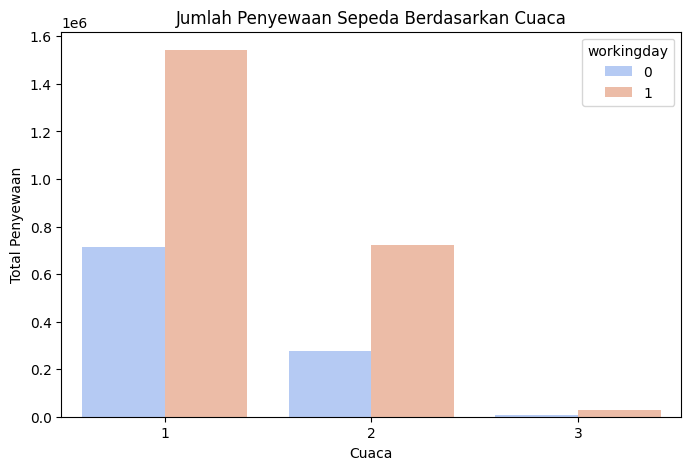

In [26]:
plt.figure(figsize=(8, 5))
sns.barplot(data=weather_rentals, x='weathersit', y='cnt', palette='coolwarm',hue="workingday")
plt.title('Jumlah Penyewaan Sepeda Berdasarkan Cuaca')
plt.xlabel('Cuaca')
plt.ylabel('Total Penyewaan')
plt.show()

### Pertanyaan 2:

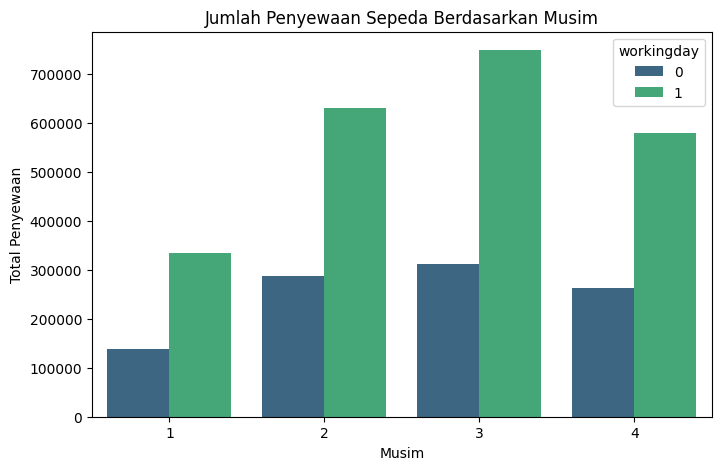

In [27]:
plt.figure(figsize=(8, 5))
sns.barplot(data=season_rentals, x='season', y='cnt', palette='viridis',hue='workingday')
plt.title('Jumlah Penyewaan Sepeda Berdasarkan Musim')
plt.xlabel('Musim')
plt.ylabel('Total Penyewaan')
plt.show()

Text(0.5, 0, 'Cuaca')

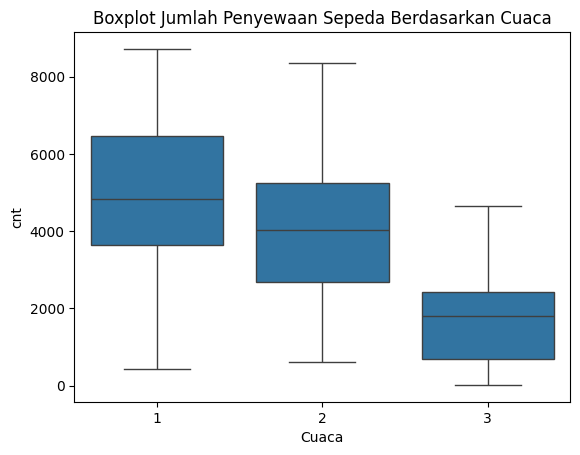

In [28]:
sns.boxplot(data=day_df, x='weathersit', y='cnt')
plt.title('Boxplot Jumlah Penyewaan Sepeda Berdasarkan Cuaca')
plt.xlabel('Cuaca')

Text(0.5, 0, 'Cuaca')

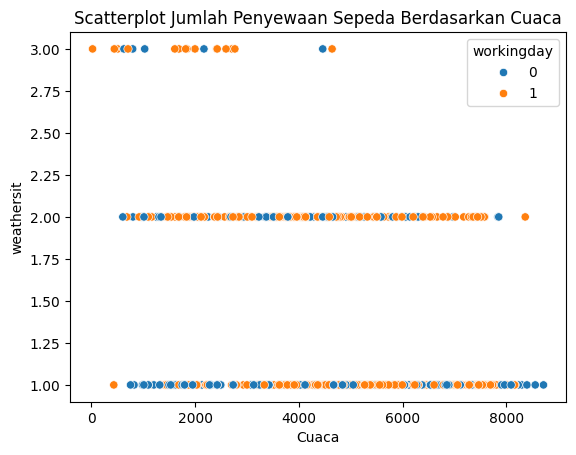

In [29]:
sns.scatterplot(data=day_df, x='cnt', y='weathersit',hue='workingday')
plt.title('Scatterplot Jumlah Penyewaan Sepeda Berdasarkan Cuaca')
plt.xlabel('Cuaca')

Text(0.5, 1.0, 'Pairplot Jumlah Penyewaan Sepeda Berdasarkan Cuaca')

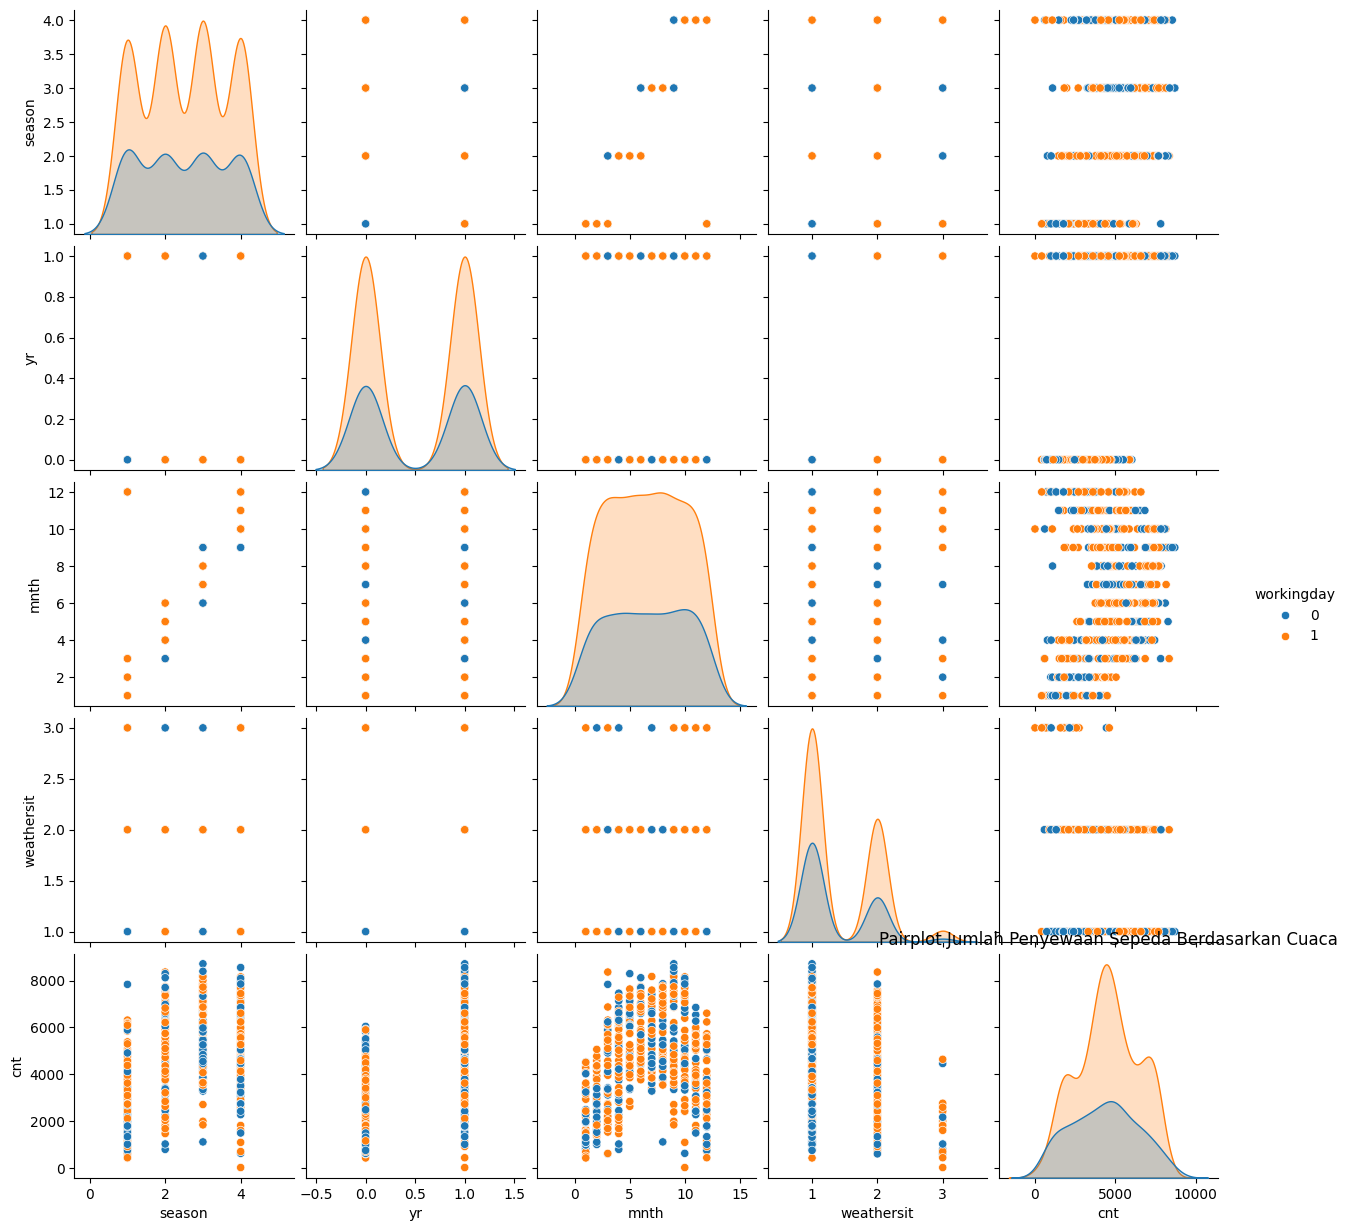

In [33]:
sns.pairplot(data=day_df, hue='workingday')
plt.title('Pairplot Jumlah Penyewaan Sepeda Berdasarkan Cuaca')

**Insight:**
- Berdasarkan Hasil Visualisasi, Jumlah Penyewaan Sepeda Berdasarkan Cuaca, untuk Grafik Pareto yang tertinggi No.1 (Cuaca Cerah)
- Berdasarkan Hasil Visualisasi, Jumlah Penyewaan Sepeda Berdasarkan Musim, untuk Grafik Pareto yang tertinggi No.3 (Musim Gugur)
- Weekend lebih tinggi jumlah sewanya dibandingkan Workingday

## Analisis Lanjutan (Opsional)

## Conclusion

- **Conclution pertanyaan 1**

Cuaca yang paling ramai untuk penyewaan sepeda?

Berdasarkan pengolahan data pivot table per kondisi cuaca, didapatkan data tertinggi (1.Cerah)

Berdasarkan Hasil Visualisasi, Jumlah Penyewaan Sepeda Berdasarkan Cuaca, untuk Grafik Pareto yang tertinggi No.1 (Cuaca Cerah)

- **Conclution pertanyaan 2**

Musim yang paling ramai untuk penyewaan sepeda?

Berdasarkan pengolahan data pivot table per musim, didapatkan data tertinggi (3.Musim Gugur)

Berdasarkan Hasil Visualisasi, Jumlah Penyewaan Sepeda Berdasarkan Musim, untuk Grafik Pareto yang tertinggi No.3 (Musim Gugur)

In [ ]:
all_df = pd.concat([day_df, hour_df], axis=0)


In [ ]:
all_df.to_csv("all_data.csv", index=False)